In [5]:
import pandas as pd
import plotting as p
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import metrics as m
from sklearn.preprocessing import MinMaxScaler
from timegan.timegan.model import TimeGAN
from timegan.synthesizers.gan import ModelParameters

In [ ]:
# clonar repositório
!git clone https://github.com/ifribeiro/gan_bike.git

In [ ]:
# entrar no repositorio
cd gan_bike

In [2]:
data = pd.read_csv("datasets/bike_sharing_2011to2019.csv", parse_dates=[0])

# Treinamento

In [6]:
treino = data['cnt'].values
scaler = MinMaxScaler().fit(treino.reshape(-1,1))
treino_s = scaler.transform(treino.reshape(-1,1)).reshape(data.shape[0]//24, 24, 1)

In [7]:
### definição dos hiperparâmetros
# parâmetros constantes
seq_len_m1 = treino_s.shape[1]
n_seq_m1 = 1

# parâmetros para modificar

hidden_dim_m1=24
gamma_m1=1

noise_dim_m1 = 128
dim_m1 = 128
batch_size_m1 = 7 # 1 semana

log_step_m1 = 100
learning_rate_m1 = 5e-4

gan_args_m1 = ModelParameters(batch_size=batch_size_m1,
                           lr=learning_rate_m1,
                           noise_dim=noise_dim_m1,
                           layers_dim=dim_m1)

In [8]:
synth = TimeGAN(model_parameters=gan_args_m1, hidden_dim=hidden_dim_m1, seq_len=seq_len_m1, n_seq=n_seq_m1, gamma=gamma_m1)
synth.train(treino_s, train_steps=1)

2023-05-01 10:49:09.333614: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-01 10:49:09.333820: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-01 10:49:09.334136: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-05-01 10:49:09.334251: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-05-01 10:49:09.334439: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

# Avaliação

In [9]:
# gerar dados
exp_name="T1"
falso = synth.sample(len(treino_s))
falso_rescaled = scaler.inverse_transform(falso.reshape(-1,1))
falso_rescaled = falso_rescaled.flatten()
p.plot_compare(data, falso_rescaled, exp_name)

Synthetic data generation: 100%|██████████| 470/470 [01:35<00:00,  4.91it/s]


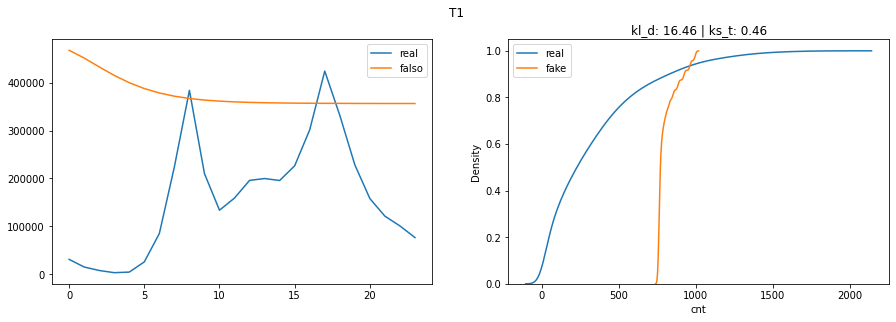

In [12]:
exp_name="A"


# Salvar modelo, amostra e imagem

In [15]:
synth.save(f"{exp_name}.pkl")
np.save(f"sample_{exp_name}.npy", falso)